# Волкова Татьяна ПИ19-2 Вариант 3

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

In [160]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [161]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Построить модель линейной регрессии на имеющихся данных

In [162]:
df_x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x.csv')
df_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y.csv')

df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [163]:
df_y.head()

,Unnamed: 0,0
0,0,101.159902
1,1,78.442913
2,2,-159.238195
3,3,120.719533
4,4,2.920673


In [164]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first') # , on=0)
res.shape

(20, 3)

In [165]:
df_res = res.iloc[:, [1,2]]
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


Зашумим входные данные

In [166]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise

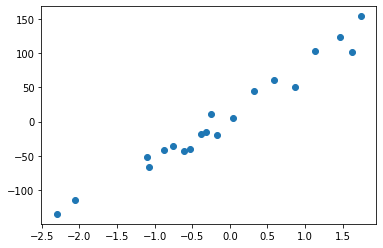

In [167]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

In [168]:
# Создаем датасет

class XYDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.FloatTensor(X)
    self.y = torch.FloatTensor(y)

  def __len__(self):
    return self.X.size(0)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

XYdataset = XYDataset(X=df_res['0_x'], y=df_res['0_y'])
XYdataset.X, XYdataset.y

(tensor([ 1.4621,  1.1338, -2.3015,  1.7448,  0.0422, -0.6118,  0.3190, -0.7612,
          0.5828, -1.0999,  0.8654,  1.6243, -0.5282, -0.2494, -1.0730, -0.3841,
         -0.1724, -0.3224, -2.0601, -0.8779]),
 tensor([ 124.1599,  103.1429, -134.9382,  154.1195,    5.7207,  -43.5260,
           44.8736,  -35.7662,   61.5237,  -52.1990,   50.4756,  102.3847,
          -39.4430,   11.8466,  -66.6362,  -17.7718,  -19.0299,  -15.4073,
         -114.7364,  -41.0370]))

In [169]:
# Разбиваем на тренировочную и тестовую выборки

train_size = round(0.8 * len(XYdataset))
train_dataset, test_dataset = torch.utils.data.random_split(XYdataset, [train_size, len(XYdataset)-train_size])

In [170]:
# Создаем даталоадер

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [171]:
n_features = 4
n_outputs = 1

# модель
model = nn.Sequential(nn.Linear(n_features, 15),
                      nn.ReLU(),
                      nn.Dropout(), # отсеивающий слой для предотвращения переобучения модели
                      torch.nn.Linear(15, 10),
                      torch.nn.ReLU(),
                      nn.Linear(10, n_outputs))
# функция потерь
loss = torch.nn.MSELoss()

# метод оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [177]:
# обучение и тест

losses = []
losses_test = []
n_epochs = 100

for epoch_index in range(n_epochs):
  for i, (X_sample, y_sample) in enumerate(train_dataloader):
    optimizer.zero_grad()
    y_pred = model.forward(X_sample)
    loss_val = loss(y_pred, y_sample)
    loss_val.backward()
    optimizer.step()
    # r2 = r2_score(y_pred, y_sample)

  losses.append(loss_val)
  if epoch_index % 10 == 0: print(f"epoch {epoch_index} train MSE loss: {loss_val}")

  for i, (x_example, y_example) in enumerate(test_dataloader):
    y_pred = model(x_example)
    loss_val = loss(y_pred, y_example)
    losses_test.append(loss_val.item())
  if epoch_index % 10 == 0: print(f"epoch {epoch_index} test MSE loss: {loss_val}")

epoch 0 train MSE loss: 1864.140380859375
epoch 0 test MSE loss: 2185.088623046875
epoch 10 train MSE loss: 4899.7646484375
epoch 10 test MSE loss: 2198.5625
epoch 20 train MSE loss: 4357.826171875
epoch 20 test MSE loss: 2776.34228515625
epoch 30 train MSE loss: 1921.2279052734375
epoch 30 test MSE loss: 2282.154541015625
epoch 40 train MSE loss: 4668.01318359375
epoch 40 test MSE loss: 2258.5546875
epoch 50 train MSE loss: 6492.15185546875
epoch 50 test MSE loss: 2999.318603515625
epoch 60 train MSE loss: 12142.5966796875
epoch 60 test MSE loss: 3308.83056640625
epoch 70 train MSE loss: 3775.8994140625
epoch 70 test MSE loss: 3039.4560546875
epoch 80 train MSE loss: 1692.421875
epoch 80 test MSE loss: 2055.469970703125
epoch 90 train MSE loss: 8489.6533203125
epoch 90 test MSE loss: 2503.91162109375


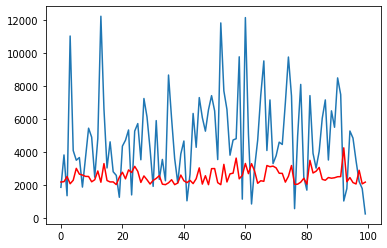

In [178]:
with torch.no_grad():
  plt.plot(losses)
  plt.plot(losses_test, color = "red")

Ничего не обучается, ошибки рандомные вообще, как повезет, мож датасет очень маленький 

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

